In [9]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv("D:\AI & DS\Pandas\mall-customers-data.csv")
display(df.head())
df.corr()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,customer_id,age,annual_income,spending_score
customer_id,1.000000,-0.026763,0.977548,0.013835
age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


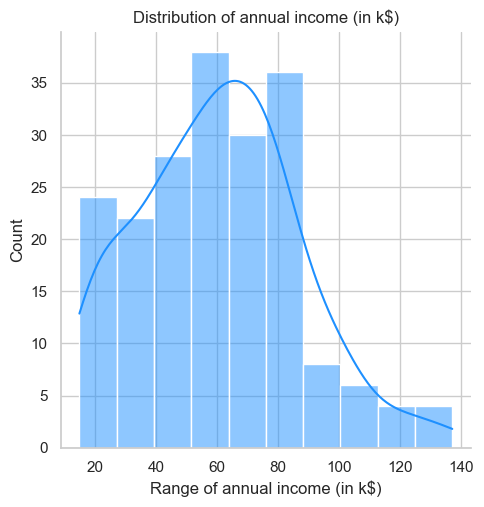

In [11]:
# distribution of annual income
sns.set(style="whitegrid")
sns.displot(df["annual_income"], kde=True, color="dodgerblue")

plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

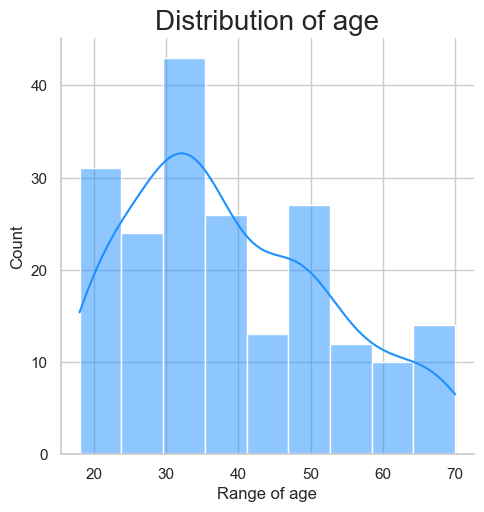

In [12]:
# distribution of age
sns.set(style="whitegrid")
sns.displot(df["age"], kde=True, color="dodgerblue")

plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

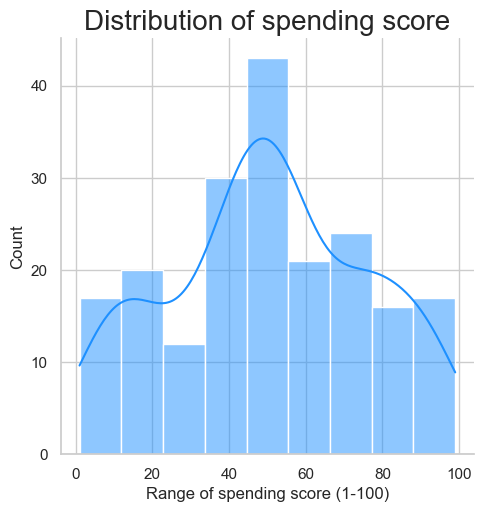

In [13]:
# distribution of spending score
sns.set(style="whitegrid")
sns.displot(df["spending_score"], kde=True, color="dodgerblue")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

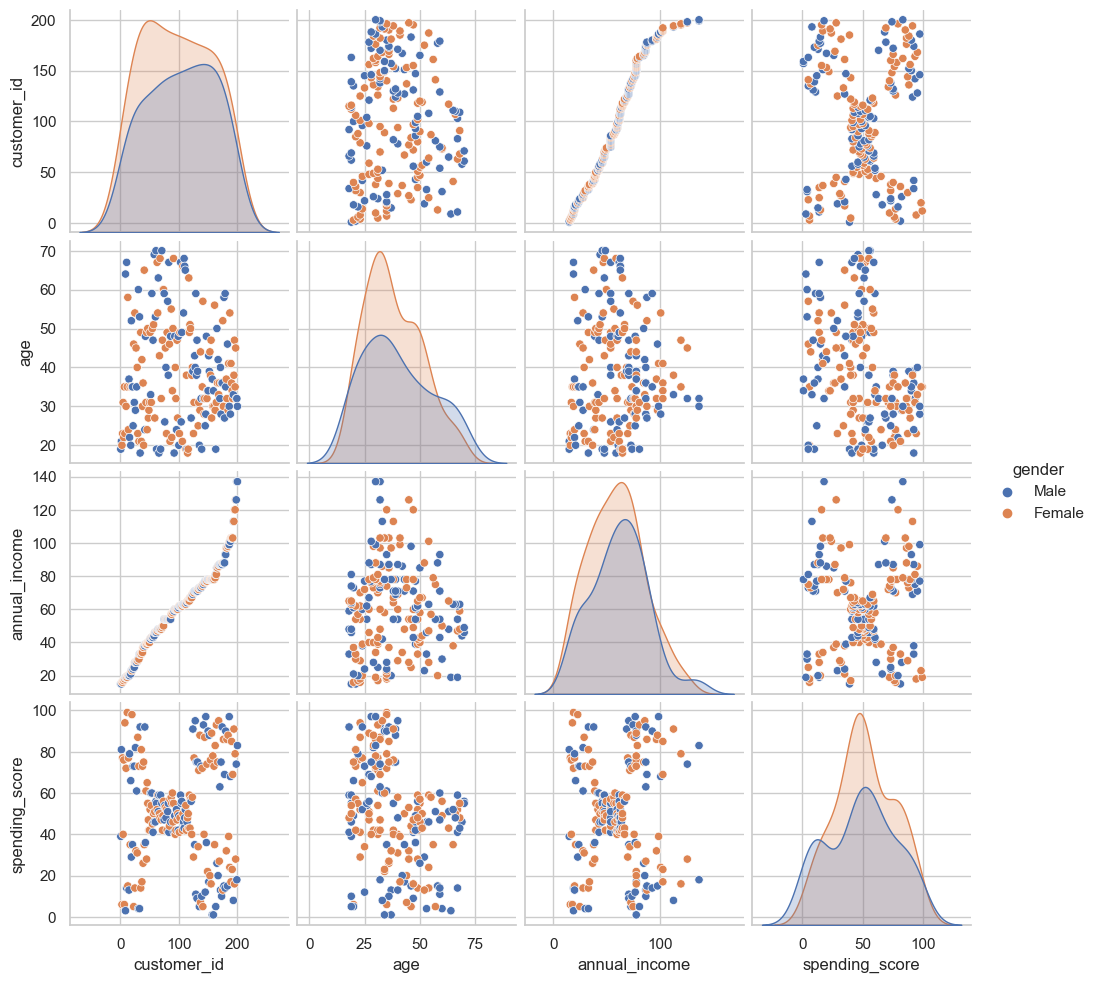

In [14]:
sns.pairplot(df,hue='gender')

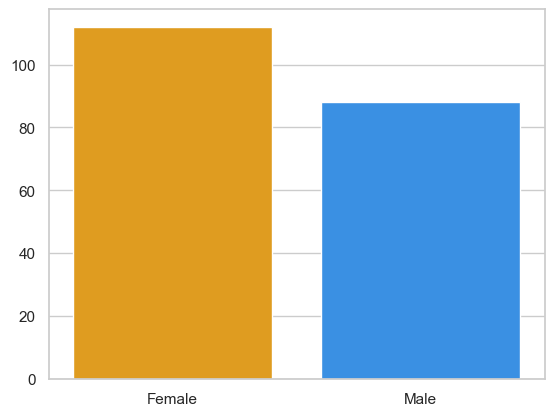

In [15]:
# gender analysis
genders = df["gender"].value_counts()

colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}

sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=colors)

plt.show()

In [16]:
# considering two features: annual income and spending score
X = df[["annual_income", "spending_score"]]
X.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


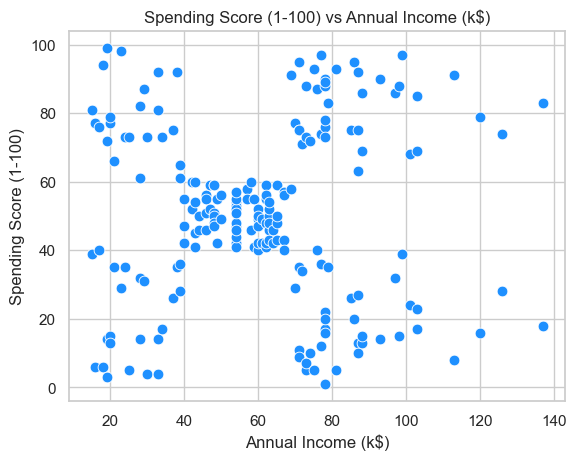

In [17]:
# scatterplot of the above data
sns.scatterplot(x="annual_income", y="spending_score", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

In [30]:
df.corr()

,customer_id,age,annual_income,spending_score,label
customer_id,1.000000,-0.026763,0.977548,0.013835,-0.281636
age,-0.026763,1.000000,-0.012398,-0.327227,0.057227
annual_income,0.977548,-0.012398,1.000000,0.009903,-0.273065
spending_score,0.013835,-0.327227,0.009903,1.000000,0.252272
label,-0.281636,0.057227,-0.273065,0.252272,1.000000


<AxesSubplot:>

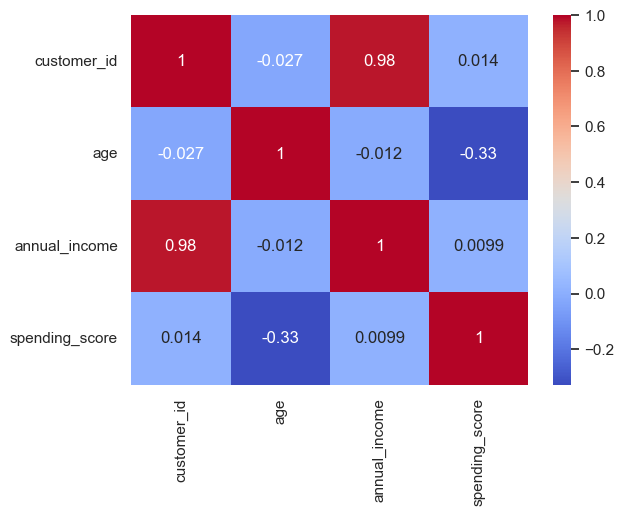

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

C:\Users\Eshwaran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


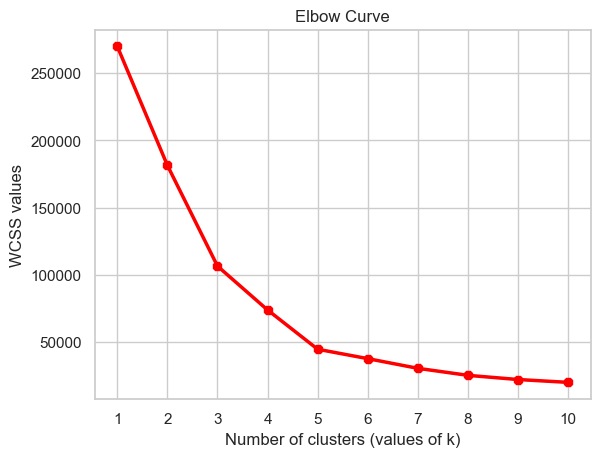

In [20]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()

In [22]:
# taking k = 5
k_means_1 = KMeans(n_clusters=5)

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named label
df["label"] = y_pred

df.head()

,customer_id,gender,age,annual_income,spending_score,label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [26]:
centers =pd.DataFrame(k_means_1.cluster_centers_)
centers.columns = ['x','y']

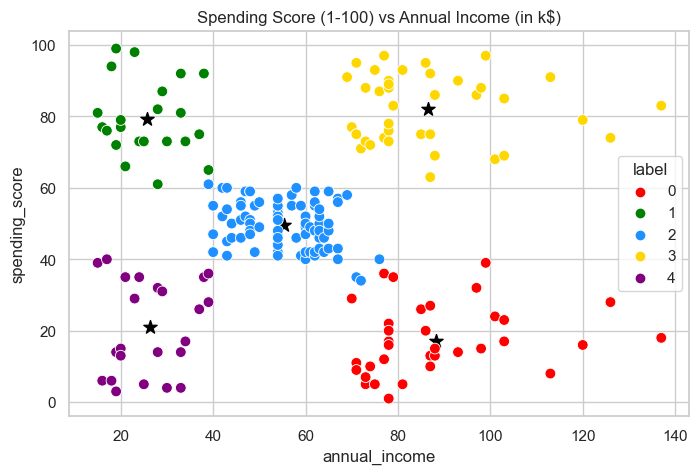

In [29]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# scatterplot of the clusters

plt.figure(figsize=(8,5))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(x="annual_income",y="spending_score",hue="label", palette=colors, legend="full", data=df, s=60)
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()